In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv("demo.csv" , names = ["user", "amount","id","date"])
df.head()

,user,amount,id,date
0,Sylvester Sykes,9014.58,1009014458,2018-10-24
1,Brandon Wheeler,8590.93,1006789262,2018-10-24
2,Wing Roth,25660.92,1025660292,2018-10-24
3,Zachary Roth,9178.23,1009178723,2018-10-24
4,Otto Barron,6754.46,1006754446,2018-10-24


### Editar columnas

In [4]:
# df.withColumn("Col_Name" , lit(125))

In [5]:
df["id"]  = 125

### Obtener subsets de un data frame

In [6]:
df[0:1]

,user,amount,id,date
0,Sylvester Sykes,9014.58,125,2018-10-24


In [7]:
df.loc[0:4 ,    ["amount" , "date"] ]

,amount,date
0,9014.58,2018-10-24
1,8590.93,2018-10-24
2,25660.92,2018-10-24
3,9178.23,2018-10-24
4,6754.46,2018-10-24


### Subset con mascara boleana

In [8]:
df.tail()

,user,amount,id,date
94,Jakeem Bowers,21281.47,125,2018-11-29
95,Ross Pittman,72924.95,125,2018-07-23
96,Nathaniel Sanford,73541.17,125,2018-08-05
97,Drew Cummings,72015.79,125,2019-08-26
98,Christopher Morto,25694.88,125,2019-12-08


In [9]:
boolean_mask = df.amount > 90000

In [10]:
type(boolean_mask)

pandas.core.series.Series

In [11]:
#df.loc[   boolean_mask    ]      Por si necesito solamente filtrar bajo una condicion
df.loc[   boolean_mask    ,   ["user","amount"]    ]

,user,amount
18,Harlan Morse,92112.64
24,Cyrus Reid,92331.14
52,Quentin Cannon,92484.59
74,Ali Rosa,97798.93
77,Jonah Wolf,98432.19
84,Charles Heath,98107.66
85,Dustin Cooley,91474.28


In [12]:
function_mask = lambda df : df["amount"] > 90000

In [13]:
type(function_mask)

function

In [14]:
df.loc[function_mask,   ["user","amount"]    ]

,user,amount
18,Harlan Morse,92112.64
24,Cyrus Reid,92331.14
52,Quentin Cannon,92484.59
74,Ali Rosa,97798.93
77,Jonah Wolf,98432.19
84,Charles Heath,98107.66
85,Dustin Cooley,91474.28


In [15]:
df.head(1)

,user,amount,id,date
0,Sylvester Sykes,9014.58,125,2018-10-24


In [16]:
# Otras formas de  filtrar por slice y por columnas

# df[ ["user","amount","id"]   ]
# df[0:25]
# df[   boolean_mask  ]

### Manejo de Fechas

In [17]:
df.head()

,user,amount,id,date
0,Sylvester Sykes,9014.58,125,2018-10-24
1,Brandon Wheeler,8590.93,125,2018-10-24
2,Wing Roth,25660.92,125,2018-10-24
3,Zachary Roth,9178.23,125,2018-10-24
4,Otto Barron,6754.46,125,2018-10-24


In [18]:
from datetime import datetime

parser =  lambda x :  datetime.strptime(x, '%Y-%m-%d %I-%p')

df1 = pd.read_csv("ETH_1h.csv",  parse_dates=["Date"] , date_parser=parser)

In [19]:
#df.printSchema
#df.dtypes

In [20]:
df1["DayName"] = df1["Date"].dt.day_name()

In [21]:
df1

,Date,Symbol,Open,High,Low,Close,Volume,DayName
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [22]:
fecha1 , fecha2  =  pd.to_datetime('2020-01-01') ,pd.to_datetime('2020-03-13')

In [23]:
time_filter  =    ( df1["Date"] >=  fecha1) & ( df1["Date"] <=  fecha2)

In [24]:
df1.loc[time_filter]

,Date,Symbol,Open,High,Low,Close,Volume,DayName
20,2020-03-13 00:00:00,ETHUSD,110.30,117.50,102.92,107.09,10329663.69,Friday
21,2020-03-12 23:00:00,ETHUSD,126.78,126.82,101.22,110.30,19338895.12,Thursday
22,2020-03-12 22:00:00,ETHUSD,130.30,134.25,124.83,126.78,8822759.15,Thursday
23,2020-03-12 21:00:00,ETHUSD,128.15,132.14,122.83,130.30,6500631.29,Thursday
24,2020-03-12 20:00:00,ETHUSD,138.00,138.96,124.04,128.15,19731142.71,Thursday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [35]:
dfx = df1.set_index("DayName")

In [41]:
dfx

,Date,Symbol,Open,High,Low,Close,Volume
DayName,,,,,,,
Friday,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
Friday,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
Friday,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
Friday,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
Friday,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
Saturday,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
Saturday,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
Saturday,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99


In [42]:
dfx.loc["Friday" , ["Date"]]

,Date
DayName,
Friday,2020-03-13 20:00:00
Friday,2020-03-13 19:00:00
Friday,2020-03-13 18:00:00
Friday,2020-03-13 17:00:00
Friday,2020-03-13 16:00:00
...,...
Friday,2017-07-07 04:00:00
Friday,2017-07-07 03:00:00
Friday,2017-07-07 02:00:00


In [25]:
#df.Low.plot()

In [26]:
df2 = df1.set_index('Date')

<AxesSubplot:xlabel='Date'>

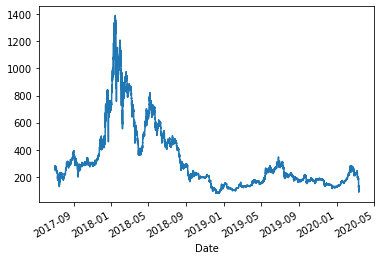

In [27]:
df2.Low.plot()

In [33]:
df2.loc['2019' : '2020'    , ["Low"] ]

,Low
Date,
2020-03-13 20:00:00,126.87
2020-03-13 19:00:00,117.10
2020-03-13 18:00:00,115.50
2020-03-13 17:00:00,121.63
2020-03-13 16:00:00,120.17
...,...
2019-01-01 04:00:00,130.74
2019-01-01 03:00:00,130.06
2019-01-01 02:00:00,129.55


In [29]:
df2

,Symbol,Open,High,Low,Close,Volume,DayName
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [30]:
df2.resample('3T').agg( {           
    'Close' : 'mean' ,
    'High' : 'max' ,
    'Low'  : 'min',
    'Volume' : 'sum'})["High"]#.plot()

Date
2017-07-01 11:00:00    279.99
2017-07-01 11:03:00       NaN
2017-07-01 11:06:00       NaN
2017-07-01 11:09:00       NaN
2017-07-01 11:12:00       NaN
                        ...  
2020-03-13 19:48:00       NaN
2020-03-13 19:51:00       NaN
2020-03-13 19:54:00       NaN
2020-03-13 19:57:00       NaN
2020-03-13 20:00:00    131.82
Freq: 3T, Name: High, Length: 473461, dtype: float64